In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import CA data
full_data = pd.read_csv("full_data.csv")
full_data.head(10)

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
0,3,0.586512,0.216692,0.0,R,Solano,0.490460,VAR,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,1
1,3,0.538525,0.231791,0.0,R,Alameda,0.491550,W,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.207880,1
2,2,0.566540,0.233155,0.0,R,Contra Costa,0.489915,N,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,0
3,3,0.507039,0.237035,0.0,R,Santa Clara,0.491187,N,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,1
4,2,0.498200,0.249386,0.0,R,Santa Clara,0.491550,VAR,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.219759,0
5,3,0.545908,0.249769,0.0,R,Alameda,0.490460,VAR,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.201941,1
6,3,0.506410,0.253332,0.0,R,Santa Clara,0.491187,VAR,Cloudy,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.207880,1
7,3,0.547768,0.194857,0.0,R,San Francisco,0.491187,NE,Cloudy,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,1
8,2,0.563530,0.220454,0.0,R,Contra Costa,0.489915,N,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,0
9,3,0.545841,0.260438,0.0,R,Alameda,0.490460,VAR,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,1


# Part 1

In [3]:
#Import
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [4]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

### 1. set up training data, validation set and test data

In [5]:
# 1. Look at the year to make sure if we could use year to seperate the data
full_data['Year'].value_counts()

0.00    80101
1.00    71262
0.25    51706
0.75    10206
Name: Year, dtype: int64

In [6]:
data = full_data.groupby(full_data['Year'])['Severity3'].value_counts()
data

Year  Severity3
0.00  0            43382
      1            36719
0.25  0            27942
      1            23764
0.75  0             6686
      1             3520
1.00  0            50053
      1            21209
Name: Severity3, dtype: int64

In [7]:
#2. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Pressure','Distance','Start_Lng','Start_Lat','Year','Day','Hour','Time_Duration']
full_data[features] = scaler.fit_transform(full_data[features])
full_data.head()

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
0,3,0.586512,0.216692,0.0,R,Solano,0.490460,VAR,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,1
1,3,0.538525,0.231791,0.0,R,Alameda,0.491550,W,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.207880,1
2,2,0.566540,0.233155,0.0,R,Contra Costa,0.489915,N,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,0
3,3,0.507039,0.237035,0.0,R,Santa Clara,0.491187,N,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.112849,1
4,2,0.498200,0.249386,0.0,R,Santa Clara,0.491550,VAR,Clear,False,...,False,False,Day,0.0,Jun,0.666667,0.434783,Tue,0.219759,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
#3. Split Trian set and Test set
x = full_data.drop(['Year', 'Severity', 'Severity3'], axis=1)
y = full_data['Severity3']

x = x.replace([True, False], [1,0])

category = ['Side','Wind_Direction','Weekday', 'County', 'Weather_Condition', 'Sunrise_Sunset', 'Month']
x[category] = x[category].astype('category')
x = pd.get_dummies(x, columns=category, drop_first=True)

x_Train, x_test, y_Train, y_test = train_test_split(x, y, test_size=0.30, random_state=88)
x_Train.shape,x_test.shape

((149292, 113), (63983, 113))

In [10]:
#4. Split train and validation set
X_train, x_val, Y_train, y_val = train_test_split(x_Train, y_Train, test_size=0.10, random_state=88)
X_train.shape,x_val.shape

((134362, 113), (14930, 113))

### 2. Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf_base = LogisticRegression(max_iter = 1000)
grid = {'C': 10.0 ** np.arange(-2, 3),
        'class_weight': ['balanced']}
clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=8,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'class_weight': ['balanced']},
             scoring='f1_macro')

In [12]:
print("Best parameters scores:")
print(clf_lr.best_params_)
print("Train score:", clf_lr.score(X_train, Y_train))
print("Validation score:", clf_lr.score(x_val, y_val))

coef = clf_lr.best_estimator_.coef_
intercept = clf_lr.best_estimator_.intercept_
print (classification_report(y_val, clf_lr.predict(x_val)))

Best parameters scores:
{'C': 100.0, 'class_weight': 'balanced'}
Train score: 0.7074505882625046
Validation score: 0.7106317425328467
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      8934
           1       0.60      0.81      0.69      5996

    accuracy                           0.71     14930
   macro avg       0.72      0.73      0.71     14930
weighted avg       0.74      0.71      0.71     14930



In [13]:
#Use the best model
lr = LogisticRegression(**clf_lr.best_params_, max_iter = 1000)
lr.fit(X_train, Y_train)

LogisticRegression(C=100.0, class_weight='balanced', max_iter=1000)

## 3. Random Forest Model

In [14]:
import time
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}

tic = time.time()

rf2 = RandomForestRegressor() 

cv = KFold(n_splits=5,random_state=333,shuffle=True) 
grid = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
grid.fit(X_train, Y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')
print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, Y_train))
print("Validation score:", grid.score(x_val, y_val))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=50, total=  24.2s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=50, total=  25.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=  24.6s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=  24.6s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=  24.9s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=  50.5s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=  49.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=  49.6s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 308.6min finished


time: 19543.47 s
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.950921060327081
Validation score: 0.6837807090312519


In [15]:
toc = time.time()

print('time:', round(toc-tic, 2),'s')
print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, Y_train))
print("Validation score:", grid.score(x_val, y_val))

time: 19565.17 s
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.950921060327081
Validation score: 0.6837807090312519


In [16]:
rf2 = RandomForestClassifier(max_depth = 30, n_estimators = 500)

print("Default scores:")
rf2.fit(X_train, Y_train)
print("Train score:", rf2.score(X_train, Y_train))
print("Validation score:", rf2.score(x_val, y_val))

Default scores:
Train score: 0.9837602893675295
Validation score: 0.8330207635632954


## 4. Naive Bayes

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

print("Train score:", gnb.score(X_train, Y_train))
print("Validation score:", gnb.score(x_val, y_val))

Train score: 0.5293981929414566
Validation score: 0.5275954454119223


## 5. Test Set Performance

### (a) Logistic Regression Model

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = lr.predict(x_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)
f1["Logistic Regression"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.72     38590
           1       0.59      0.81      0.69     25393

    accuracy                           0.71     63983
   macro avg       0.71      0.72      0.70     63983
weighted avg       0.74      0.71      0.71     63983



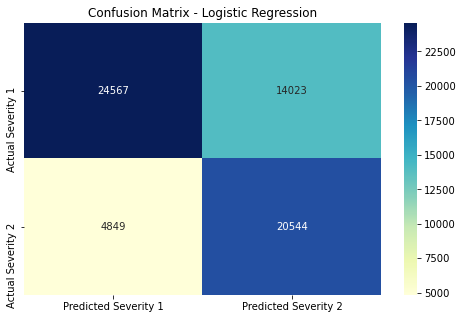

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

[[0.98284208 0.01715792]
 [0.36792403 0.63207597]
 [0.37891823 0.62108177]
 ...
 [0.2490101  0.7509899 ]
 [0.35056945 0.64943055]
 [0.86766049 0.13233951]]


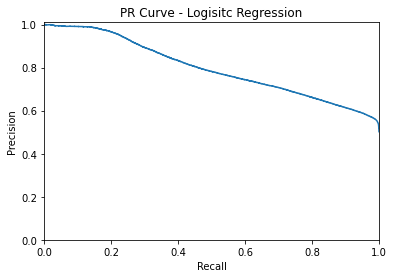

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y = label_binarize(y_test, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = lr.predict_proba(x_test)
print(y_score)
precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

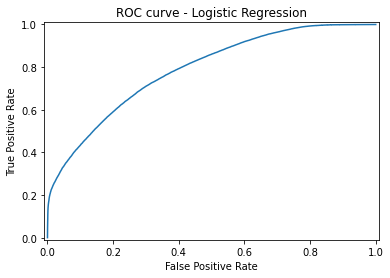

In [21]:
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.show()

### (b) Random Forest 

In [22]:
y_pred = rf2.predict(x_test)

accuracy["Random Forest"] = accuracy_score(y_test.values, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     38590
           1       0.77      0.82      0.79     25393

    accuracy                           0.83     63983
   macro avg       0.82      0.83      0.83     63983
weighted avg       0.83      0.83      0.83     63983



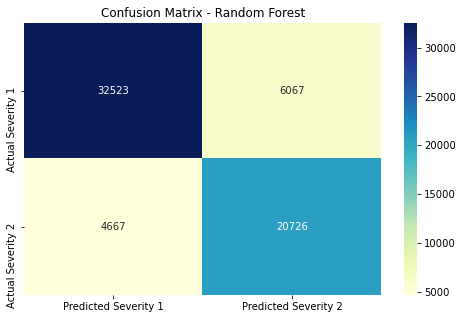

In [23]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

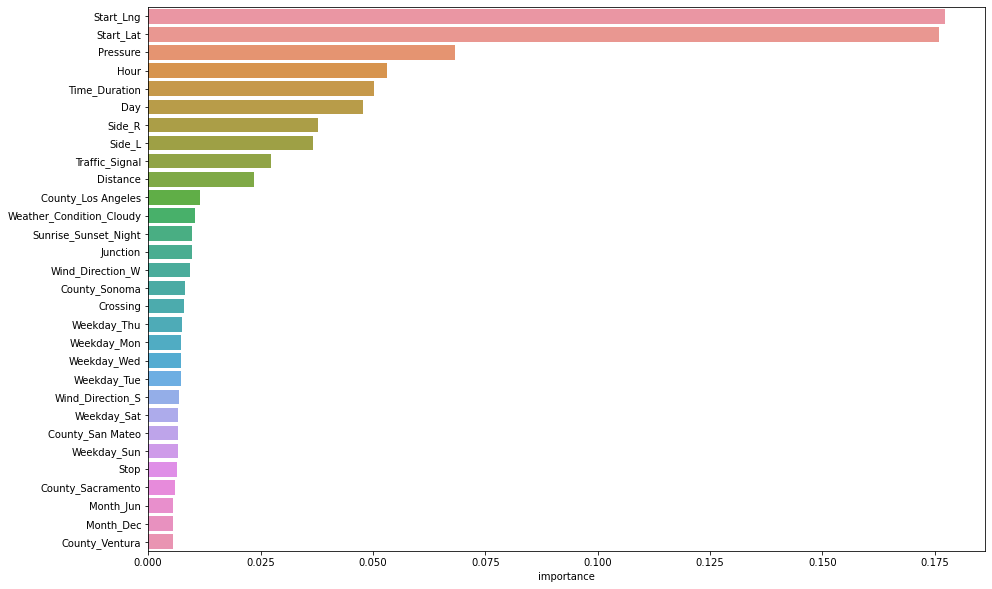

In [24]:
importances = pd.DataFrame(np.zeros((x_test.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rf2.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

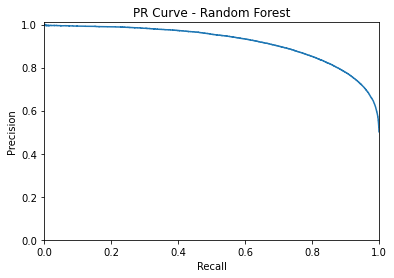

In [25]:
#PR curve
enc = OneHotEncoder()
Y = label_binarize(y_test, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = rf2.predict_proba(x_test)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

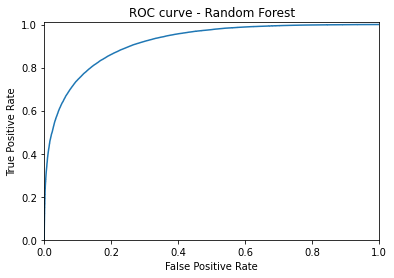

In [26]:
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

y_pred = rf2.predict(x_test)
print("AUC score:", roc_auc_score(y_test, y_pred))

AUC score: 0.8294961479703354


### (c) Naive Bayes

In [28]:
y_pred = gnb.predict(x_test)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_test, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.22      0.36     38590
           1       0.46      0.99      0.62     25393

    accuracy                           0.53     63983
   macro avg       0.71      0.61      0.49     63983
weighted avg       0.76      0.53      0.47     63983



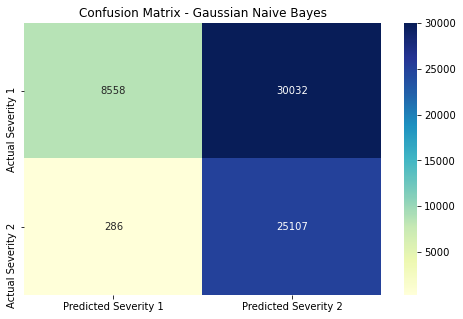

In [29]:
y_pred = gnb.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

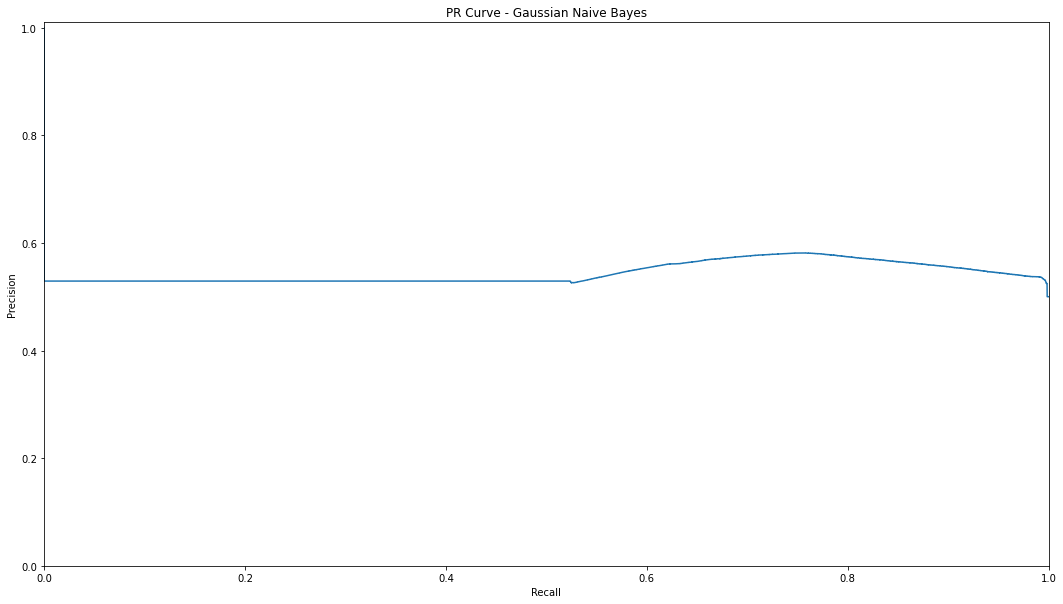

In [30]:
enc = OneHotEncoder()
Y = label_binarize(y_test, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = gnb.predict_proba(x_test)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

### (d) Result

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


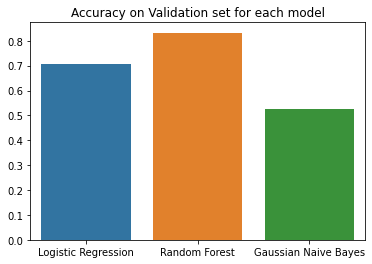

In [31]:
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


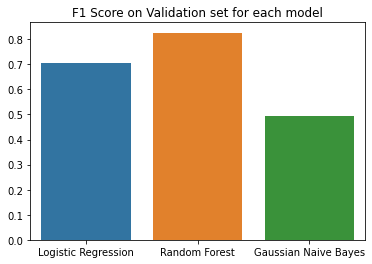

In [32]:
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

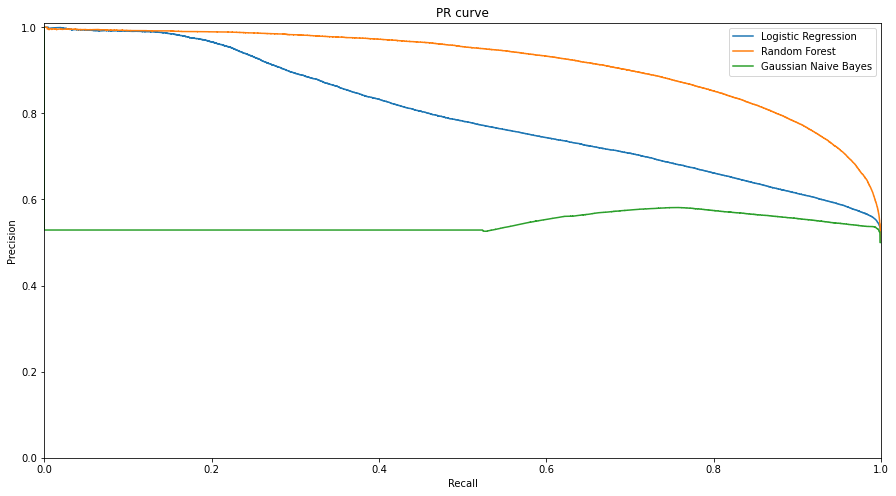

In [33]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

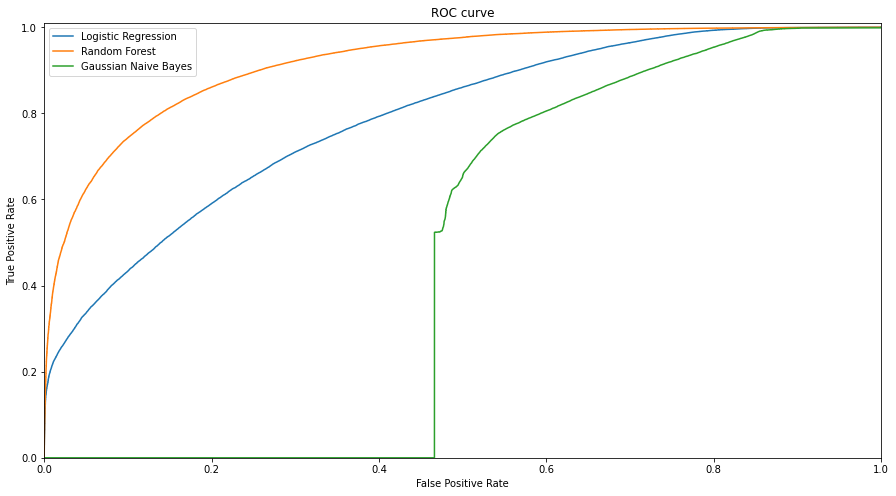

In [34]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

# Part 2 ---- Add Population Density

## 1. Adding Variable and Split Data

In [35]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [36]:
CA_popdensity = pd.read_csv("CA_pop_density.csv")
scaler = MinMaxScaler()
features = ['Population Density']
CA_popdensity[features] = scaler.fit_transform(CA_popdensity[features])
CA_popdensity

,County,Population Density
0,Alameda,0.118876
1,Alpine,0.000000
2,Amador,0.003638
3,Butte,0.007731
4,Calaveras,0.002509
5,Colusa,0.000990
6,Contra Costa,0.085204
7,Del Norte,0.001560
8,El Dorado,0.006078
9,Fresno,0.009000


In [37]:
full_data_new = pd.merge(full_data, CA_popdensity)
full_data_new

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3,Population Density
0,3,0.586512,0.216692,0.0,R,Solano,0.490460,VAR,Clear,False,...,False,Day,0.00,Jun,0.666667,0.434783,Tue,0.112849,1,0.029189
1,3,0.620332,0.249207,0.0,R,Solano,0.489006,S,Clear,False,...,False,Day,0.00,Jun,0.666667,0.652174,Tue,0.112849,1,0.029189
2,3,0.630599,0.261717,0.0,R,Solano,0.488461,S,Clear,False,...,False,Night,0.00,Jun,0.666667,0.956522,Tue,0.112849,1,0.029189
3,3,0.603126,0.231550,0.0,R,Solano,0.489733,W,Clear,False,...,False,Day,0.00,Jun,0.700000,0.391304,Wed,0.112849,1,0.029189
4,3,0.588146,0.217012,0.0,R,Solano,0.489551,S,Clear,False,...,False,Day,0.00,Jun,0.700000,0.478261,Wed,0.112849,1,0.029189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213270,2,0.900539,0.169429,0.0,R,Trinity,0.445757,CALM,Clear,False,...,False,Day,1.00,Feb,0.400000,0.521739,Thu,0.397942,0,0.000157
213271,2,0.833651,0.121187,0.0,R,Trinity,0.443576,CALM,Cloudy,False,...,False,Day,0.75,Dec,0.100000,0.695652,Wed,0.201941,0,0.000157
213272,2,0.867347,0.114004,0.0,L,Trinity,0.452299,W,Clear,False,...,False,Day,0.75,Dec,0.500000,0.478261,Mon,0.754308,0,0.000157
213273,2,0.866799,0.144875,0.0,L,Trinity,0.446665,CALM,Clear,True,...,False,Day,0.75,Oct,0.200000,0.565217,Mon,0.469215,0,0.000157


In [38]:
#3. Split Trian set and Test set
x = full_data_new.drop(['Year', 'Severity', 'Severity3'], axis=1)
y = full_data_new['Severity3']

x = x.replace([True, False], [1,0])

category = ['Side','Wind_Direction','Weekday', 'County', 'Weather_Condition', 'Sunrise_Sunset', 'Month']
x[category] = x[category].astype('category')
x = pd.get_dummies(x, columns=category, drop_first=True)

x_Train, x_test, y_Train, y_test = train_test_split(x, y, test_size=0.30, random_state=88)
x_Train.shape,x_test.shape

((149292, 114), (63983, 114))

In [39]:
#4. Split train and validation set
X_train, x_val, Y_train, y_val = train_test_split(x_Train, y_Train, test_size=0.10, random_state=88)
X_train.shape,x_val.shape

((134362, 114), (14930, 114))

## 2. Logistic Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf_base = LogisticRegression(max_iter = 1000)
grid = {'C': 10.0 ** np.arange(-2, 3),
        'class_weight': ['balanced']}
clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=8,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'class_weight': ['balanced']},
             scoring='f1_macro')

In [41]:
print("Best parameters scores:")
print(clf_lr.best_params_)
print("Train score:", clf_lr.score(X_train, Y_train))
print("Validation score:", clf_lr.score(x_val, y_val))

coef = clf_lr.best_estimator_.coef_
intercept = clf_lr.best_estimator_.intercept_
print (classification_report(y_val, clf_lr.predict(x_val)))

Best parameters scores:
{'C': 100.0, 'class_weight': 'balanced'}
Train score: 0.7065110118285001
Validation score: 0.7044928707910152
              precision    recall  f1-score   support

           0       0.83      0.63      0.72      8865
           1       0.60      0.81      0.69      6065

    accuracy                           0.71     14930
   macro avg       0.72      0.72      0.70     14930
weighted avg       0.74      0.71      0.71     14930



In [42]:
#Use the best model
lr_population = LogisticRegression(**clf_lr.best_params_, max_iter = 1000)
lr_population.fit(X_train, Y_train)

LogisticRegression(C=100.0, class_weight='balanced', max_iter=1000)

## 3. Random Forest Model

In [43]:
import time
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}

tic = time.time()

rf2 = RandomForestClassifier() 

cv = KFold(n_splits=5,random_state=333,shuffle=True) 
grid = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
grid.fit(X_train, Y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')
print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, Y_train))
print("Validation score:", grid.score(x_val, y_val))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=50, total=   3.7s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=50, total=   3.8s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   3.9s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   3.7s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   4.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   7.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   7.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   7.1s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 49.5min finished


time: 3169.55 s
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.955156275667802
Validation score: 0.31217767287920994


In [44]:
rf_population = RandomForestClassifier(max_depth = 30, n_estimators = 500)

print("Default scores:")
rf_population.fit(X_train, Y_train)
print("Train score:", rf_population.score(X_train, Y_train))
print("Validation score:", rf_population.score(x_val, y_val))

Default scores:
Train score: 0.9889998660335512
Validation score: 0.8359678499665104


## 4. Naive Bayes

In [45]:
gnb_population = GaussianNB()
gnb_population.fit(X_train, Y_train)

print("Train score:", gnb_population.score(X_train, Y_train))
print("Validation score:", gnb_population.score(x_val, y_val))

Train score: 0.5269346987987675
Validation score: 0.5253851306095111


## 5. Test Performance

### (a). Logistic Regression Model

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = lr_population.predict(x_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)
f1["Logistic Regression"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73     38462
           1       0.60      0.81      0.69     25521

    accuracy                           0.71     63983
   macro avg       0.72      0.73      0.71     63983
weighted avg       0.74      0.71      0.71     63983



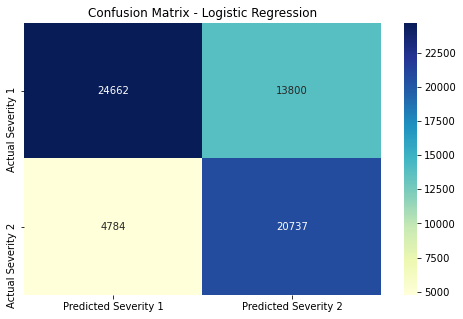

In [47]:
from sklearn.metrics import confusion_matrix

y_pred = lr_population.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

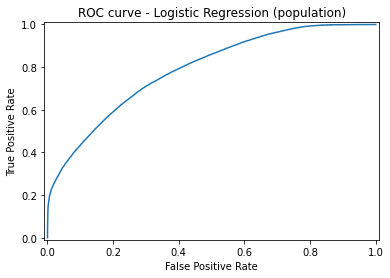

In [48]:
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression (population)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.show()

### (b). Random Forest

In [49]:
y_pred = rf_population.predict(x_test)

accuracy["Random Forest"] = accuracy_score(y_test.values, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     38462
           1       0.78      0.82      0.80     25521

    accuracy                           0.84     63983
   macro avg       0.83      0.83      0.83     63983
weighted avg       0.84      0.84      0.84     63983



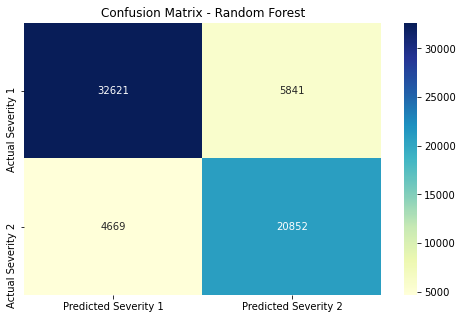

In [50]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

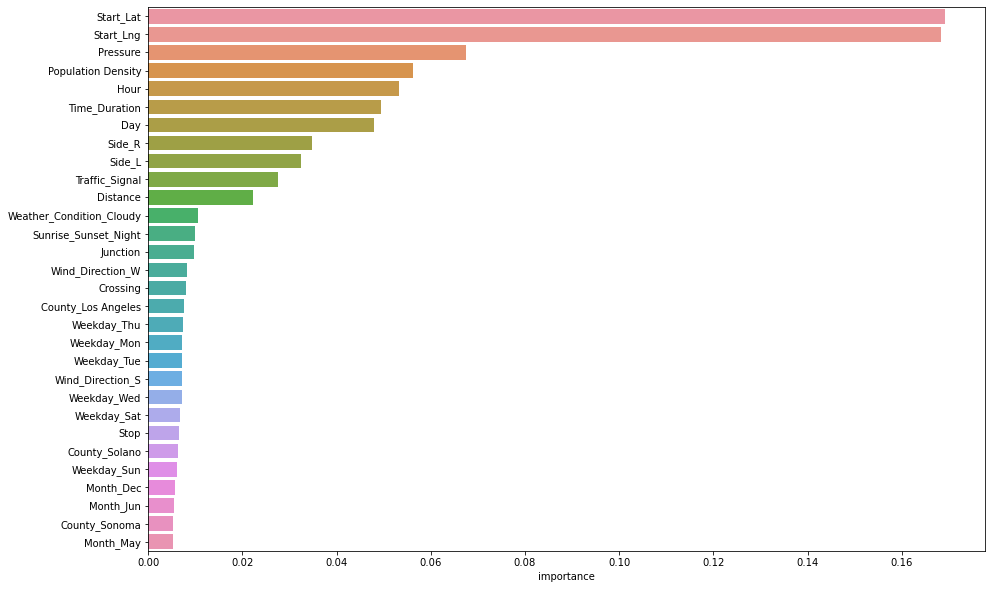

In [51]:
importances = pd.DataFrame(np.zeros((x_test.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rf_population.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

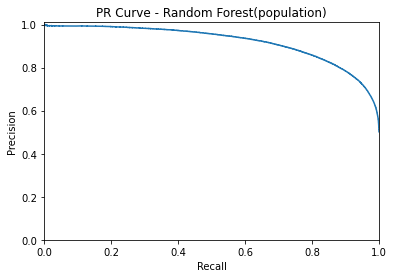

In [52]:
enc = OneHotEncoder()
Y = label_binarize(y_test, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = rf_population.predict_proba(x_test)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest(population)")
plt.show()

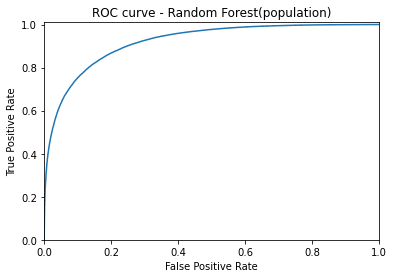

In [53]:
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest(population)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

y_pred = rf_population.predict(x_test)
print("AUC score:", roc_auc_score(y_test, y_pred))

AUC score: 0.8325942228499692


### (c). Naive Bayes

In [55]:
y_pred = gnb_population.predict(x_test)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_test, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.23      0.37     38462
           1       0.46      0.99      0.63     25521

    accuracy                           0.53     63983
   macro avg       0.71      0.61      0.50     63983
weighted avg       0.77      0.53      0.47     63983



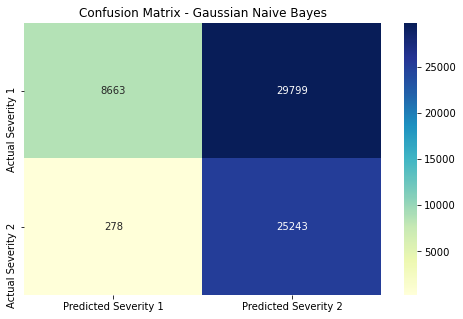

In [56]:
y_pred = gnb_population.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

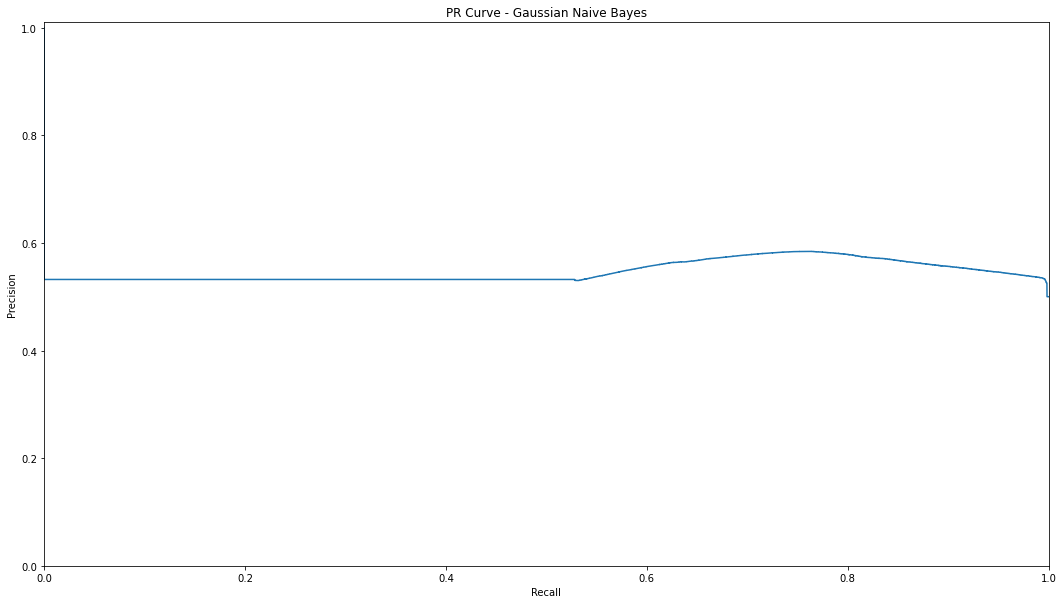

In [57]:
enc = OneHotEncoder()
Y = label_binarize(y_test, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = gnb_population.predict_proba(x_test)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

# Overall Result

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


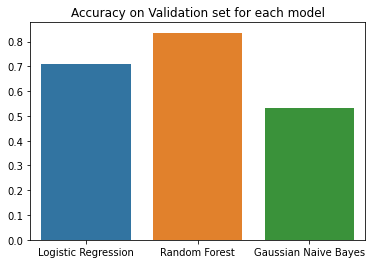

In [58]:
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


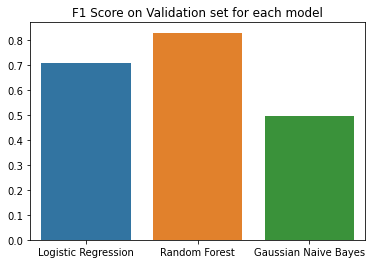

In [59]:
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

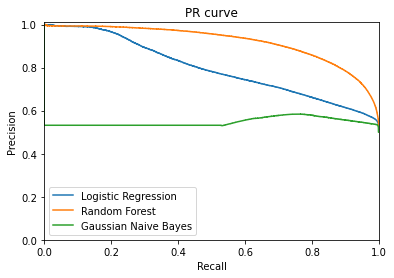

In [60]:
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

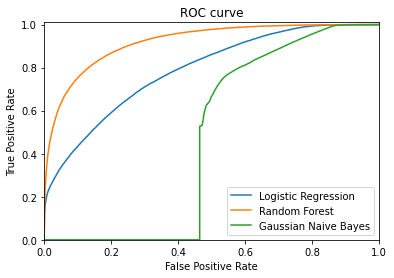

In [61]:
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()